## Simulazione dell'esperimento di Buffon.

Riportiamo i risultati della simulazione dell'esperimento di Buffon per il calcolo approssimato di $\pi$. La singola simulazione dell'esperimento conteneva $N_{throws} = 10^5$ lanci della sbarretta, e portava ad una singola stima di $\pi$: l'esperimento è stato quindi simulato 1000 volte, portando a 1000 stime di $\pi$. Con queste si è potuto fare la statistica dei risultati e fare un grafico dell'andamento del valore medio e dell'errore commesso all'aumentare del numero di simulazioni. Osservazioni ulteriori, riguardanti il funzionamento del codice, sono riportate nella funzione main.

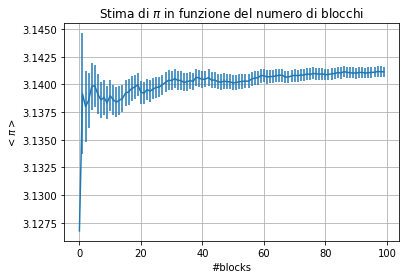

Il valore di p-greco è:  3.141592653589793
Il valore stimato di p-greco è:  3.141155 +/- 0.00046820852108728634


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV1,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV1[n] - AV2[n])/n)
    
# Carico i valori medi da file
x, p_ave, p_ave2 = np.loadtxt("pi_test.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')

N = len(x)
# Calcolo l'errore statistico tramite la funzione error
e = np.zeros(N)
for i in range(N):
    e[i] = error(p_ave, p_ave2,i)

# Riduco il numero di punti da plottare di un fattore 10
m = N//10
n = np.arange(m)
pi = np.zeros(m)
er = np.zeros(m)
for i in range(m):
    pi[i] = x[i*10]
    er[i] = e[i*10]
        

plt.errorbar(n, pi, er)
plt.xlabel('#blocks')
plt.ylabel('$<\pi>$')
plt.title('Stima di $\pi$ in funzione del numero di blocchi')
plt.grid(True)
plt.show()

print('Il valore di p-greco è: ', math.pi)
print('Il valore stimato di p-greco è: ', x[N-1], '+/-', e[N-1])

### Conclusioni

Il valore ottenuto è compatibile entro 1$\sigma$ con il valore vero.